# PROJECT 1: AIR QUALITY IN HANOI
# Extract and Clean AQI & Weather Data from API
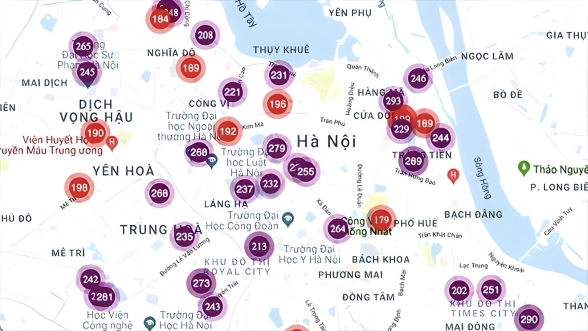

# I. Import libraries

In [11]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px

%matplotlib inline


# II. Extract Data from API and create Dataframe for AQI data

In this project, I will use data from [Weatherbit](https://www.weatherbit.io/), which offers a comprehensive suite of APIs providing high-resolution weather data. This data is sourced from satellites, radars, weather stations, and various sensors.

For air quality data, Weatherbit's API can retrieve historical AQI data on an hourly basis, with a custom date range of up to 30 days for any location. Specifically, I will be retrieving AQI data for Hanoi, Vietnam.

## 2.1. Specify the URLs

In [12]:
# Specify the URL of the API endpoint for retrieving information about fish species.
#Code: 65207954a7014c50b377fcb740dff32a
url = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2024-02-08&end_date=2024-03-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url2 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2024-01-08&end_date=2024-02-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url3 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-12-08&end_date=2024-01-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url4 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-11-08&end_date=2023-12-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url5 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-10-08&end_date=2023-11-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url6 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-09-08&end_date=2023-10-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url7 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-08-08&end_date=2023-09-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url8 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-07-08&end_date=2023-08-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url9 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-06-08&end_date=2023-07-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url10 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-05-08&end_date=2023-06-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url11 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-04-08&end_date=2023-05-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
url12 = "https://api.weatherbit.io/v2.0/history/airquality?city=Hanoi&start_date=2023-03-08&end_date=2023-04-08&tz=local&key=65207954a7014c50b377fcb740dff32a"


Due to the API's limitation of 800 historical data points per request, which corresponds to 800 hourly data values, I will specify 12 separate URL (720 data points each request) to obtain hourly AQI data for an entire year.

## 2.2. Make HTTP GET requests, parse JSON data and store them in specified variables

In [13]:
data = requests.get(url)
results = json.loads(data.text)
data2 = requests.get(url2)
results2 = json.loads(data2.text)
data3 = requests.get(url3)
results3 = json.loads(data3.text)
data4 = requests.get(url4)
results4 = json.loads(data4.text)
data5 = requests.get(url5)
results5 = json.loads(data5.text)
data6 = requests.get(url6)
results6 = json.loads(data6.text)
data7 = requests.get(url7)
results7 = json.loads(data7.text)
data8 = requests.get(url8)
results8 = json.loads(data8.text)
data9 = requests.get(url9)
results9 = json.loads(data9.text)
data10 = requests.get(url10)
results10 = json.loads(data10.text)
data11 = requests.get(url11)
results11 = json.loads(data11.text)
data12 = requests.get(url12)
results12 = json.loads(data12.text)

In [14]:
results

{'city_name': 'Hanoi',
 'country_code': 'VN',
 'data': [{'aqi': 159,
   'co': 4760.2,
   'datetime': '2024-03-07:17',
   'no2': 37.8,
   'o3': 20.4,
   'pm10': 116.2,
   'pm25': 62,
   'so2': 12,
   'timestamp_local': '2024-03-08T00:00:00',
   'timestamp_utc': '2024-03-07T17:00:00',
   'ts': 1709830800},
  {'aqi': 168,
   'co': 2754,
   'datetime': '2024-03-07:16',
   'no2': 29.8,
   'o3': 31.6,
   'pm10': 87.7,
   'pm25': 68.67,
   'so2': 107.3,
   'timestamp_local': '2024-03-07T23:00:00',
   'timestamp_utc': '2024-03-07T16:00:00',
   'ts': 1709827200},
  {'aqi': 241,
   'co': 504,
   'datetime': '2024-03-07:15',
   'no2': 108,
   'o3': 18.4,
   'pm10': 167,
   'pm25': 124,
   'so2': 116,
   'timestamp_local': '2024-03-07T22:00:00',
   'timestamp_utc': '2024-03-07T15:00:00',
   'ts': 1709823600},
  {'aqi': 173,
   'co': 6693.2,
   'datetime': '2024-03-07:14',
   'no2': 29.3,
   'o3': 19.5,
   'pm10': 140.6,
   'pm25': 73,
   'so2': 6,
   'timestamp_local': '2024-03-07T21:00:00',
   't

To retrieve the data in a readable format, I will parse it into JSON. I'll then access one of the variables to check the output.

The JSON contains three keys: "city_name", "country_code", and "data". The "data" key holds the AQI data we need, so we'll focus on extracting the AQI data from this key.

## 2.3. Join 'data' keys from variables and create a new dictionary

In [15]:
# Joining the 'data' keys from variables 
joined_data = results['data'] + results2['data'] + results3['data'] + results4['data'] + results5['data'] + results6['data'] + results7['data'] + results8['data'] + results9['data'] + results10['data'] + results11['data'] + results12['data']
# Creating a new dictionary with the joined data
joined_results = {
    'city_name': results['city_name'],
    'country_code': results['country_code'],
    'lat': results['lat'],
    'lon': results['lon'],
    'timezone': results['timezone'],
    'data': joined_data
}

print(joined_results)

{'city_name': 'Hanoi', 'country_code': 'VN', 'lat': 21.0245, 'lon': 105.84117, 'timezone': 'Asia/Ho_Chi_Minh', 'data': [{'aqi': 159, 'co': 4760.2, 'datetime': '2024-03-07:17', 'no2': 37.8, 'o3': 20.4, 'pm10': 116.2, 'pm25': 62, 'so2': 12, 'timestamp_local': '2024-03-08T00:00:00', 'timestamp_utc': '2024-03-07T17:00:00', 'ts': 1709830800}, {'aqi': 168, 'co': 2754, 'datetime': '2024-03-07:16', 'no2': 29.8, 'o3': 31.6, 'pm10': 87.7, 'pm25': 68.67, 'so2': 107.3, 'timestamp_local': '2024-03-07T23:00:00', 'timestamp_utc': '2024-03-07T16:00:00', 'ts': 1709827200}, {'aqi': 241, 'co': 504, 'datetime': '2024-03-07:15', 'no2': 108, 'o3': 18.4, 'pm10': 167, 'pm25': 124, 'so2': 116, 'timestamp_local': '2024-03-07T22:00:00', 'timestamp_utc': '2024-03-07T15:00:00', 'ts': 1709823600}, {'aqi': 173, 'co': 6693.2, 'datetime': '2024-03-07:14', 'no2': 29.3, 'o3': 19.5, 'pm10': 140.6, 'pm25': 73, 'so2': 6, 'timestamp_local': '2024-03-07T21:00:00', 'timestamp_utc': '2024-03-07T14:00:00', 'ts': 1709820000}, {'

In this section, I combined the "data" values from 12 different variables. As a result, the "data" key shown above now contains a list of all AQI data points from these 12 variables.

## 2.4. Convert dictionary into dataframe and wrangle data

In [16]:
# Creating DataFrame
df = pd.DataFrame(joined_results)

# Renaming columns
df.columns = ['City', 'Country code', 'Lat', 'Lon', 'timezone', 'Data']

# Splitting 'Data' column into individual columns
df[['AQI', 'CO', 'Date Time', 'NO2', 'O3', 'PM10', 'PM25', 'SO2', 'Local Time', 'UTC Time', 'TS']] = pd.DataFrame(df['Data'].tolist())

# Dropping uneccessary columns
df.drop(columns=['Data', 'Lat', 'Lon', 'TS', 'Date Time'], inplace=True)

# Dropping duplicate columns
df = df.drop_duplicates()

# Sort local time 
df = df.sort_values(by='Local Time')

# Convert 'Local Time' column to datetime object
df['Local Time'] = pd.to_datetime(df['Local Time'])

# Set 'Local Time' column as index
df.set_index('Local Time', inplace=True)

df.head()

,City,Country code,timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,UTC Time
Local Time,,,,,,,,,,,
2023-03-08 00:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,131,170.6,29.3,53.3,58.8,47.0,67.3,2023-03-07T17:00:00
2023-03-08 01:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,158.7,25.0,54.0,56.3,45.0,65.0,2023-03-07T18:00:00
2023-03-08 02:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,150.2,21.7,55.0,52.5,42.0,65.7,2023-03-07T19:00:00
2023-03-08 03:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,141.6,18.3,56.0,56.3,45.0,66.3,2023-03-07T20:00:00
2023-03-08 04:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,133.1,15.0,57.0,52.5,42.0,67.0,2023-03-07T21:00:00


After having been converted and wrangled, the AQI dataframe is set

## 2.5. Check data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8785 entries, 2023-03-08 00:00:00 to 2024-03-08 00:00:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          8785 non-null   object 
 1   Country code  8785 non-null   object 
 2   timezone      8785 non-null   object 
 3   AQI           8785 non-null   int64  
 4   CO            8785 non-null   float64
 5   NO2           8785 non-null   float64
 6   O3            8785 non-null   float64
 7   PM10          8785 non-null   float64
 8   PM25          8785 non-null   float64
 9   SO2           8785 non-null   float64
 10  UTC Time      8785 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 823.6+ KB


The hourly AQI data contains 8785 entries, spanning from 2023-03-08 00:00:00 to 2024-03-08 00:00:00. The dataframe index is set as the time series. The data types consist of integers, floats, and objects, with no missing values in any column. 

# III. Extract Data from API and create Dataframe for weather data

The method in this section will be executed in the same manner as in the previous part.

## 3.1. Specify the URLs

In [18]:
urlweath = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2024-02-08&end_date=2024-03-09&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath2 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2024-01-08&end_date=2024-02-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath3 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2023-12-08&end_date=2024-01-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath4 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2023-11-08&end_date=2023-12-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath5 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2023-10-08&end_date=2023-11-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath6 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2023-09-08&end_date=2023-10-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath7 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2023-08-08&end_date=2023-09-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath8 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2023-07-08&end_date=2023-08-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath9 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2023-06-08&end_date=2023-07-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath10 = "https://api.weatherbit.io/v2.0/history/hourlyy?city=Hanoi&start_date=2023-05-08&end_date=2023-06-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath11 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2023-04-08&end_date=2023-05-08&tz=local&key=65207954a7014c50b377fcb740dff32a"
urlweath12 = "https://api.weatherbit.io/v2.0/history/hourly?city=Hanoi&start_date=2023-03-08&end_date=2023-04-08&tz=local&key=65207954a7014c50b377fcb740dff32a"

## 3.2. Make HTTP GET requests, parse JSON data and store them in specified variables

In [19]:
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w = requests.get(urlweath)
results_w = json.loads(data_w.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w2 = requests.get(urlweath2)
results_w2 = json.loads(data_w2.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w3 = requests.get(urlweath3)
results_w3 = json.loads(data_w3.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w4 = requests.get(urlweath4)
results_w4 = json.loads(data_w4.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w5 = requests.get(urlweath5)
results_w5 = json.loads(data_w5.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w6 = requests.get(urlweath6)
results_w6 = json.loads(data_w6.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w7 = requests.get(urlweath7)
results_w7 = json.loads(data_w7.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w8 = requests.get(urlweath8)
results_w8 = json.loads(data_w8.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w9 = requests.get(urlweath9)
results_w9 = json.loads(data_w9.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w10 = requests.get(urlweath10)
results_w10 = json.loads(data_w10.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w11 = requests.get(urlweath11)
results_w11 = json.loads(data_w11.text)
# Make an HTTP GET request to the specified URL and store the response in the data variable.
data_w12 = requests.get(urlweath12)
results_w12 = json.loads(data_w12.text)

## 3.3. Join 'data' lists and create a new dictionary

In [20]:
# Joining the 'data' lists from results and results2
joined_data_weather = results_w['data'] + results_w2['data'] + results_w3['data'] + results_w4['data'] + results_w5['data'] + results_w6['data'] + results_w7['data'] + results_w8['data'] + results_w9['data'] + results_w10['data'] + results_w11['data'] + results_w12['data']
# Creating a new dictionary with the joined data
joined_results_weather = {
    'city_name': results_w['city_name'],
    'country_code': results_w['country_code'],
    'lat': results_w['lat'],
    'lon': results_w['lon'],
    'timezone': results_w['timezone'],
    'data': joined_data_weather
}


## 3.4. Convert dictionary into dataframe and wrangle data

In [22]:
# Creating DataFrame
df_weather = pd.DataFrame(joined_results_weather)

# Renaming columns
df_weather.columns = ['City', 'Country code', 'Lat', 'Lon', 'timezone', 'Data']

# Splitting 'Data' column into individual columns
df_weather[['Apparent Temperature', 'Azimuth', 'Clouds', 'Datetime', 'Dew Point', 'DHI', 'DNI', 'Elevation Angle', 'GHI',
            'H Angle', 'Pod', 'Precipitation', 'Pressure', 'Status', 'Relative Humidity', 'Sea Level Pressure', 'Snow',
            'Solar Radiation', 'Temperature', 'Local Time', 'UTC Time', 'Timestamp', 'UV Index', 'Visibility', 'Weather',
            'Wind Direction', 'Wind Gust Speed', 'Wind Speed']] = pd.DataFrame(df_weather['Data'].tolist())

# Dropping uneeded columns
df_weather.drop(columns=['Data', 'Lat', 'Lon', 'Apparent Temperature', 'Azimuth','Datetime', 'Dew Point', 'DHI', 'DNI',
                         'Elevation Angle', 'GHI', 'H Angle', 'Pod', 'Status', 'Sea Level Pressure', 'Snow',
                         'Solar Radiation', 'Timestamp', 'Visibility', 'Wind Direction', 'Wind Gust Speed', 'Weather'], inplace=True)

# Dropping duplicate columns
df_weather = df_weather.drop_duplicates()

# Sort local time 
df_weather = df_weather.sort_values(by='Local Time')

# Convert 'Local Time' column to datetime object
df_weather['Local Time'] = pd.to_datetime(df_weather['Local Time'])

# Set 'Local Time' column as index
df_weather.set_index('Local Time', inplace=True)

# Delete 23 bottom rows so that number of rows in weather dataframe is equal to number of rows in aqi dataframe
df_weather = df_weather[:-23]

df_weather
#df.head()

,City,Country code,timezone,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UTC Time,UV Index,Wind Speed
Local Time,,,,,,,,,,,
2023-03-08 00:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,91,0.0,1016,86,21.2,2023-03-07T17:00:00,0.0,2.00
2023-03-08 01:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,100,0.0,1016,89,21.1,2023-03-07T18:00:00,0.0,2.00
2023-03-08 02:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,100,0.0,1016,90,20.9,2023-03-07T19:00:00,0.0,1.66
2023-03-08 03:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,100,0.0,1016,91,20.7,2023-03-07T20:00:00,0.0,1.33
2023-03-08 04:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,100,0.0,1015,92,20.5,2023-03-07T21:00:00,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07 20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,100,0.0,1014,71,21.5,2024-03-07T13:00:00,0.0,1.00
2024-03-07 21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,100,0.0,1015,75,21.1,2024-03-07T14:00:00,0.0,1.00
2024-03-07 22:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,100,0.0,1016,80,20.6,2024-03-07T15:00:00,0.0,1.00


## 3.5. Check data types

In [23]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8785 entries, 2023-03-08 00:00:00 to 2024-03-08 00:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               8785 non-null   object 
 1   Country code       8785 non-null   object 
 2   timezone           8785 non-null   object 
 3   Clouds             8785 non-null   int64  
 4   Precipitation      8785 non-null   float64
 5   Pressure           8785 non-null   int64  
 6   Relative Humidity  8785 non-null   int64  
 7   Temperature        8785 non-null   float64
 8   UTC Time           8785 non-null   object 
 9   UV Index           8785 non-null   float64
 10  Wind Speed         8785 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 823.6+ KB


The hourly weather data also contains 8785 entries with no missing values, spanning from 2023-03-08 00:00:00 to 2024-03-08 00:00:00

# IV. Merge two dataframes and wrangle data

## 4.1. Merge two dataframes

In [24]:
#Merge two dataframes keeping the local datetime index
merged_df = pd.merge(df, df_weather, left_index=True, right_index=True)
#Drop duplicated columns
merged_df.drop(columns=['City_y', 'Country code_y', 'timezone_y', 'UTC Time_y'], inplace=True)
#Put UTC time column to the first column in the dataframe
utc_time_column = merged_df.pop('UTC Time_x')
merged_df.insert(0, 'UTC Time', utc_time_column)
#Rename 4 columns
merged_df = merged_df.rename(columns={'City_x': 'City', 'Country code_x': 'Country Code', 'timezone_x':'Timezone'})
merged_df


,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,,,,,
2023-03-08 00:00:00,2023-03-07T17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,131,170.6,29.3,53.3,58.8,47.00,67.3,91,0.0,1016,86,21.2,0.0,2.00
2023-03-08 01:00:00,2023-03-07T18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,158.7,25.0,54.0,56.3,45.00,65.0,100,0.0,1016,89,21.1,0.0,2.00
2023-03-08 02:00:00,2023-03-07T19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,150.2,21.7,55.0,52.5,42.00,65.7,100,0.0,1016,90,20.9,0.0,1.66
2023-03-08 03:00:00,2023-03-07T20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,141.6,18.3,56.0,56.3,45.00,66.3,100,0.0,1016,91,20.7,0.0,1.33
2023-03-08 04:00:00,2023-03-07T21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,133.1,15.0,57.0,52.5,42.00,67.0,100,0.0,1015,92,20.5,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07 20:00:00,2024-03-07T13:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,193,6738.4,36.7,21.4,139.3,87.86,12.0,100,0.0,1014,71,21.5,0.0,1.00
2024-03-07 21:00:00,2024-03-07T14:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,173,6693.2,29.3,19.5,140.6,73.00,6.0,100,0.0,1015,75,21.1,0.0,1.00
2024-03-07 22:00:00,2024-03-07T15:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,241,504.0,108.0,18.4,167.0,124.00,116.0,100,0.0,1016,80,20.6,0.0,1.00


## 4.2. Check data types

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8785 entries, 2023-03-08 00:00:00 to 2024-03-08 00:00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UTC Time           8785 non-null   object 
 1   City               8785 non-null   object 
 2   Country Code       8785 non-null   object 
 3   Timezone           8785 non-null   object 
 4   AQI                8785 non-null   int64  
 5   CO                 8785 non-null   float64
 6   NO2                8785 non-null   float64
 7   O3                 8785 non-null   float64
 8   PM10               8785 non-null   float64
 9   PM25               8785 non-null   float64
 10  SO2                8785 non-null   float64
 11  Clouds             8785 non-null   int64  
 12  Precipitation      8785 non-null   float64
 13  Pressure           8785 non-null   int64  
 14  Relative Humidity  8785 non-null   int64  
 15  Temperature        8785 non-null   f

## 4.3. Save data frame into csv file

In [26]:
merged_df.to_csv('hanoi-aqi-weather-data.csv')

The dataset is ready to go!